## The goal of this notebook is to show that the algorithm is able to estimate an abrupt/faulty cluster

Since the thetas are randomly generated, not computed from the data collected by the bms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from notebooks.online_learning.utils.plotting_utils import threed_scatter, samples_and_outliers

Nominal Clusters

In [2]:
cluster_0_df = pd.read_csv("../../nominal_cluster/phi_0_kmeans.csv")
cluster_1_df = pd.read_csv("../../nominal_cluster/phi_1_kmeans.csv")
cluster_2_df = pd.read_csv("../../nominal_cluster/phi_2_kmeans.csv")
cluster_3_df = pd.read_csv("../../nominal_cluster/phi_3_kmeans.csv")

In [3]:
cluster_0_df = cluster_0_df.rename(columns={'C_1':'c','R_1':'rc','R_0':'r0'})
cluster_3_df = cluster_3_df.rename(columns={'C_1':'c','R_1':'rc','R_0':'r0'})
cluster_2_df = cluster_2_df.rename(columns={'C_1':'c','R_1':'rc','R_0':'r0'})
cluster_1_df = cluster_1_df.rename(columns={'C_1':'c','R_1':'rc','R_0':'r0'})

Abrupt

In [4]:
cluster_0_hat_df = pd.read_csv("new_phi_0.csv")
cluster_1_hat_df = pd.read_csv("new_phi_1.csv")
cluster_2_hat_df = pd.read_csv("new_phi_2.csv")
cluster_3_hat_df = pd.read_csv("new_phi_3.csv")

# Comparison for cell 0

In [5]:
cluster_0_hat_df.describe()

,r0,rc,c
count,53.000000,53.000000,53.000000
mean,0.009716,0.012037,12867.013494
std,0.001604,0.003061,2779.802326
min,0.007287,0.006666,8098.610489
25%,0.008633,0.010027,10731.028600
50%,0.009672,0.011437,12700.765497
75%,0.010545,0.013250,14423.149979
max,0.013956,0.018311,20517.297277


In [6]:
cluster_0_df.describe()

,Temp,Soc,c,r0,rc,Cluster
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,29.339623,79.056604,12867.013494,0.009716,0.012037,0.0
std,6.866707,15.598835,2779.802326,0.001604,0.003061,0.0
min,20.000000,50.000000,8098.610489,0.007287,0.006666,0.0
25%,25.000000,70.000000,10731.028600,0.008633,0.010027,0.0
50%,25.000000,80.000000,12700.765497,0.009672,0.011437,0.0
75%,35.000000,90.000000,14423.149979,0.010545,0.013250,0.0
max,40.000000,100.000000,20517.297277,0.013956,0.018311,0.0


#  => It can be seen that the distribution remain unchanged

# Comparison for cell 3

In [7]:
cluster_3_df.describe()

,Temp,Soc,c,r0,rc,Cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,13.333333,47.777778,8088.639648,0.018434,0.024309,3.0
std,4.952606,31.722063,2850.623631,0.004103,0.010207,0.0
min,10.000000,0.000000,976.466778,0.013612,0.013954,3.0
25%,10.000000,20.000000,6809.928951,0.015858,0.018272,3.0
50%,10.000000,50.000000,7717.072911,0.017717,0.021690,3.0
75%,15.000000,70.000000,9348.786525,0.019670,0.026635,3.0
max,25.000000,100.000000,15552.536417,0.034656,0.070274,3.0


In [8]:
cluster_3_hat_df.describe()

,r0,rc,c
count,147.000000,147.000000,147.000000
mean,-0.056164,-0.000904,128670.184756
std,1.058708,1.099491,1.065898
min,-2.789263,-2.644607,128667.663733
25%,-0.894162,-0.955833,128669.375261
50%,0.062868,0.314268,128670.407210
75%,0.619090,0.869195,128670.917568
max,2.759344,2.761905,128673.117226


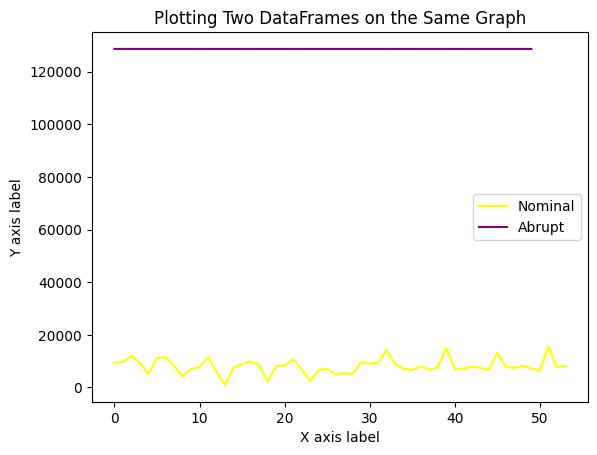

In [9]:
plt.plot(cluster_3_df['c'], label='Nominal', color='yellow')
plt.plot(cluster_3_hat_df['c'].iloc[0:50], label='Abrupt', color='purple')

plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Plotting Two DataFrames on the Same Graph')
plt.legend()

plt.show()

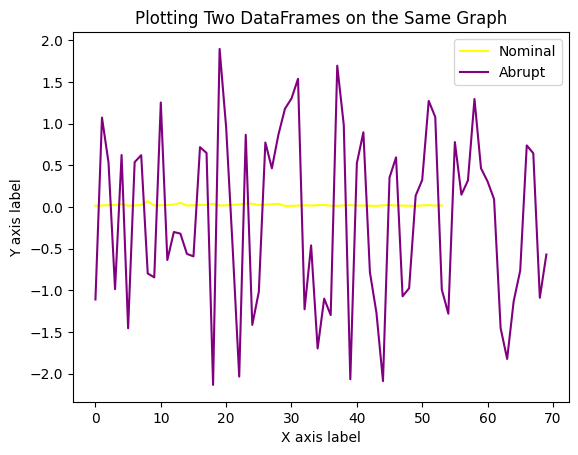

In [10]:
plt.plot(cluster_3_df['rc'], label='Nominal', color='yellow')
plt.plot(cluster_3_hat_df['rc'].iloc[0:70], label='Abrupt', color='purple')

plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Plotting Two DataFrames on the Same Graph')
plt.legend()

plt.show()

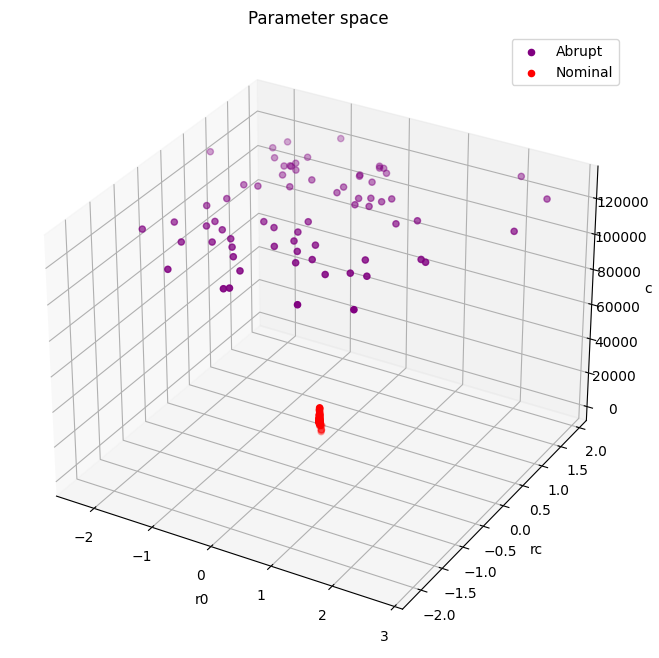

In [12]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the second DataFrame
ax.scatter(cluster_3_hat_df['r0'].iloc[0:70], cluster_3_hat_df['rc'].iloc[0:70], cluster_3_hat_df['c'].iloc[0:70], label='Abrupt', color='purple')

# Plotting the first DataFrame
ax.scatter(cluster_3_df['r0'], cluster_3_df['rc'], cluster_3_df['c'], label='Nominal', color='red')

# Adding labels and title
ax.set_xlabel('r0')
ax.set_ylabel('rc')
ax.set_zlabel('c')
ax.set_title('Parameter space')

# Adding a legend
ax.legend()

plt.show()

# cell 2 comparison

In [14]:
cluster_2_df.describe()

,Temp,Soc,c,r0,rc,Cluster
count,4.00,4.0,4.000000,4.000000,4.000000,4.0
mean,11.25,12.5,624.361218,0.028771,0.137798,2.0
std,2.50,25.0,1011.967976,0.009828,0.021040,0.0
min,10.00,0.0,103.544660,0.022908,0.108859,2.0
25%,10.00,0.0,105.365797,0.023435,0.128893,2.0
50%,10.00,0.0,125.933231,0.024364,0.144406,2.0
75%,11.25,12.5,644.928652,0.029700,0.153311,2.0
max,15.00,50.0,2142.033750,0.043449,0.153520,2.0


In [15]:
cluster_2_hat_df.describe()

,r0,rc,c
count,6.000000,6.000000,6.000000
mean,0.214395,-0.171904,128669.960543
std,1.443298,0.759030,1.104772
min,-1.879796,-1.090768,128668.728230
25%,-0.418187,-0.773371,128669.031822
50%,0.302850,-0.113447,128669.919014
75%,0.643398,0.344778,128670.840796
max,2.462085,0.782067,128671.312855


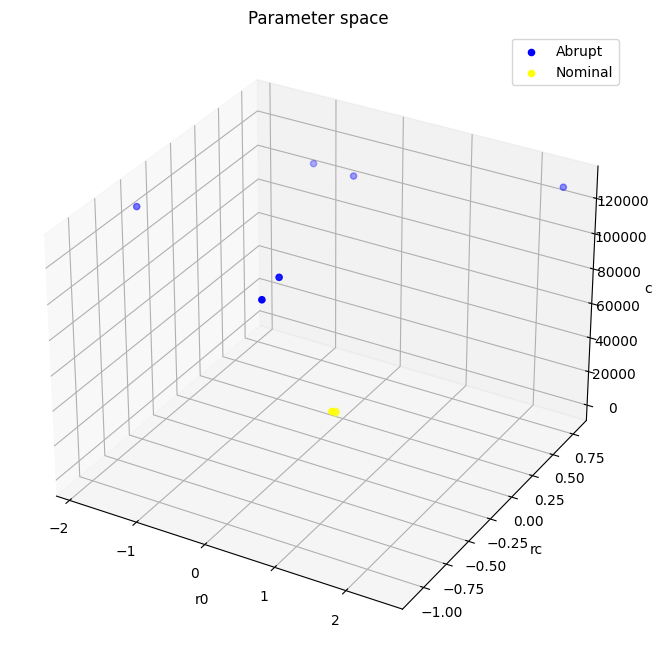

In [16]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the second DataFrame
ax.scatter(cluster_2_hat_df['r0'], cluster_2_hat_df['rc'], cluster_2_hat_df['c'], label='Abrupt', color='blue')

# Plotting the first DataFrame
ax.scatter(cluster_2_df['r0'], cluster_2_df['rc'], cluster_2_df['c'], label='Nominal', color='yellow')

# Adding labels and title
ax.set_xlabel('r0')
ax.set_ylabel('rc')
ax.set_zlabel('c')
ax.set_title('Parameter space')

# Adding a legend
ax.legend()

plt.show()

# cell1 

In [17]:
cluster_1_df.describe()

,Temp,Soc,c,r0,rc,Cluster
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,31.594203,31.594203,16071.844625,0.010172,0.012918,1.0
std,6.992262,18.440938,5627.971015,0.001762,0.003547,0.0
min,20.000000,0.000000,10131.783114,0.007612,0.008126,1.0
25%,25.000000,20.000000,12892.563026,0.008396,0.010368,1.0
50%,30.000000,30.000000,14611.322527,0.010597,0.012140,1.0
75%,40.000000,50.000000,17015.376892,0.011531,0.014999,1.0
max,40.000000,60.000000,41591.069006,0.014450,0.026787,1.0


In [18]:
cluster_1_hat_df.describe()

,r0,rc,c
count,69.000000,69.000000,69.000000
mean,0.010172,0.012918,16071.844625
std,0.001762,0.003547,5627.971015
min,0.007612,0.008126,10131.783114
25%,0.008396,0.010368,12892.563026
50%,0.010597,0.012140,14611.322527
75%,0.011531,0.014999,17015.376892
max,0.014450,0.026787,41591.069006
